In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns

import statsmodels
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

import datetime as dt
from dateutil.parser import parse
import os 

sns.set()
pd.set_option('display.max_colwidth', None)

raw = r'..\data\RawZone\IMF'
data = 'data.csv'
m_data = 'masterdata.csv'

In [2]:
df = pd.read_csv(os.path.join(raw,data))
df_md = pd.read_csv(os.path.join(raw,m_data))

In [3]:
print('Master Data Info')
print(f'Sources for the following Commodities: {df.columns[1:10].values} ')
df_md.T

Master Data Info
Sources for the following Commodities: ['aluminum' 'cobalt' 'copper' 'iron ore' 'lead' 'molybdenum' 'nickel'
 'tin' 'uranium'] 


,0
Unnamed: 0,0
aluminum,"Aluminum, US Dollars: Aluminum, 99.5% minimum purity, LME spot price, CIF UK ports, US$ per metric ton"
cobalt,"Cobalt , US Dollars: Cobalt, U.S. cathodes, spot"
copper,"Copper , US Dollars: Copper, grade A cathode, LME spot price, CIF European ports, US$ per metric ton"
iron ore,"Iron Ore, US Dollars: China import Iron Ore Fines 62% FE spot (CFR Tianjin port), US dollars per metric ton"
lead,"Lead , US Dollars: Lead, 99.97% pure, LME spot price, CIF European Ports, US$ per metric ton"
molybdenum,"Molybdenum, US Dollars: Molybdenum, 57 to 63% purity contained in roasted molybdenum concentrate, LME spot price, USD/ton"
nickel,"Nickel , US Dollars: Nickel, melting grade, LME spot price, CIF European ports, US$ per metric ton"
tin,"Tin , US Dollars: Tin, standard grade, LME spot price, US$ per metric ton"


In [4]:
print('Raw Data')
print(f'Table Size: {df.shape}')
print(f'Table Stats: {df[df.columns[1:10]].describe()}')


#df.set_index('dt_ym', inplace=True)
df['dt_ym'] = pd.to_datetime(df['dt_ym'])
df.head()

Raw Data
Table Size: (366, 14)
Table Stats:           aluminum        cobalt       copper    iron ore         lead  \
count   366.000000    366.000000   366.000000  366.000000   366.000000   
mean   1755.794470  29864.582244  4322.850865   49.519033  1288.161879   
std     425.297361  16870.861855  2435.640703   46.801684   789.270150   
min    1040.022705   6185.714286  1377.376087   11.450000   376.340912   
25%    1457.107428  18871.584212  2114.357184   12.990000   531.840149   
50%    1680.939773  27641.545455  3244.500000   28.110000   967.236742   
75%    1954.618101  34126.376766  6679.120888   73.729545  2028.777500   
max    3067.456522  95022.918844  9880.937500  187.180000  3722.608696   

         molybdenum        nickel           tin     uranium  
count    122.000000    366.000000    366.000000  366.000000  
mean   22976.177054  12621.466273  11802.345551   26.916369  
std     7108.108919   7591.340048   7166.115615   21.667639  
min    10424.227273   3865.763184   3698.

,month,aluminum,cobalt,copper,iron ore,lead,molybdenum,nickel,tin,uranium,zinc,dt_ym,dt_y,dt_m
0,Jan 1990,1528.0,7630.000114,2365.556991,14.05,707.0,NaN,7056.0,6592.000165,9.00,1294.0,1990-01-01,1990,1
1,Feb 1990,1454.0,7659.999847,2358.943400,14.05,779.0,NaN,6977.0,6156.099937,8.80,1394.0,1990-02-01,1990,2
2,Mar 1990,1567.0,8029.998779,2625.702723,14.05,1059.0,NaN,9267.0,6270.500258,8.80,1666.0,1990-03-01,1990,3
3,Apr 1990,1526.0,8229.999542,2685.226891,14.05,835.0,NaN,8939.0,6390.900579,8.65,1686.0,1990-04-01,1990,4
4,May 1990,1527.0,8150.001526,2740.342391,14.05,825.0,NaN,8698.0,6324.600508,9.35,1775.0,1990-05-01,1990,5


2007-01-01 00:00:00


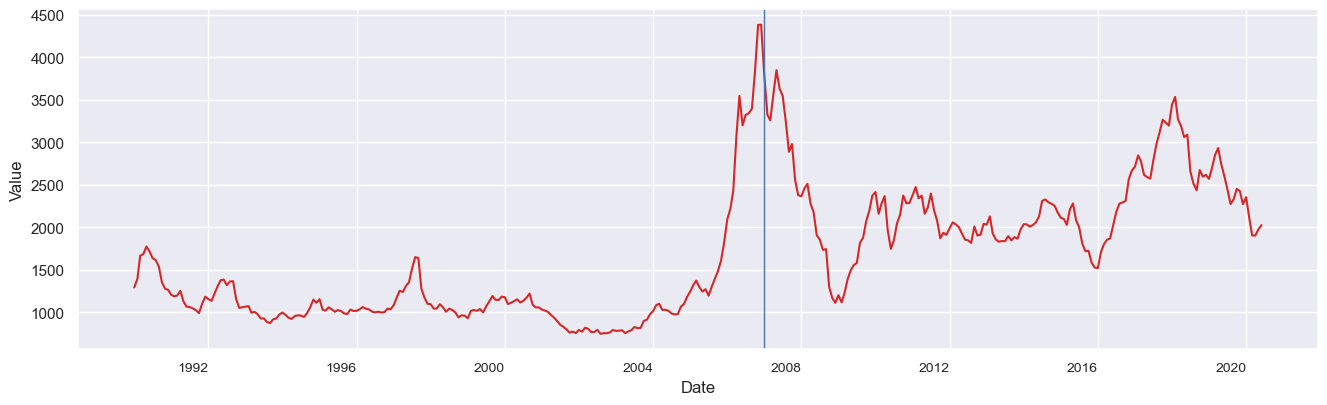

In [5]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100, **kwargs):
    vline = kwargs.get('vline')
    print(vline)
    fig, ax = plt.subplots(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.gcf().autofmt_xdate() 
    plt.setp(ax.get_xticklabels(), rotation = (0), fontsize = 10, ha='right')
    
    if vline is not None:
        plt.axvline(x=vline,linewidth=1, color='b')
    
    plt.show()
    
    
plot_df(df,x=df.dt_ym, y=df['zinc'], vline=dt.datetime(2007,1,1))

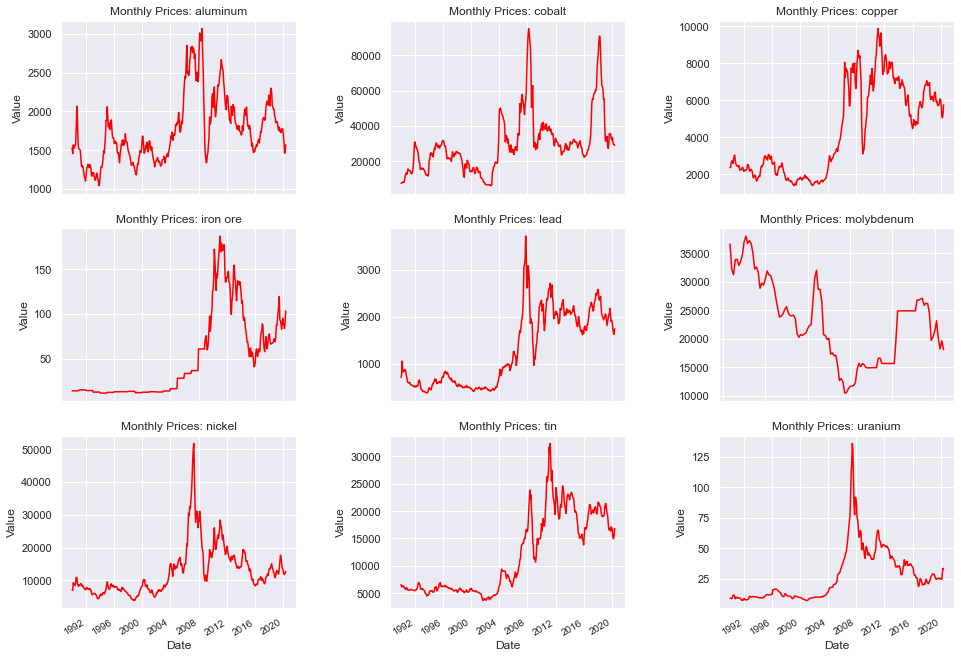

In [45]:
fig,axs = plt.subplots(ncols=3, nrows=3, figsize=(16, 12))
axs = axs.ravel()

cols = df.columns[1:10]

for i, c in enumerate(cols):
    
    sns.lineplot(x='dt_ym', y=c, data=df, color='red', ax=axs[i])
    a = axs[i]
    a.set_title(label=f"Monthly Prices: {c}")
    a.set(xlabel='Date', ylabel='Value')
    plt.setp(a.get_xticklabels(), rotation = (0), fontsize = 10, ha='right')
    
    
    #plt.gca().set(xlabel="Date", ylabel="Value")
    plt.gcf().autofmt_xdate() 
    plt.subplots_adjust(hspace=.2, wspace=.4)
    
plt.show()

2006-01-01 00:00:00


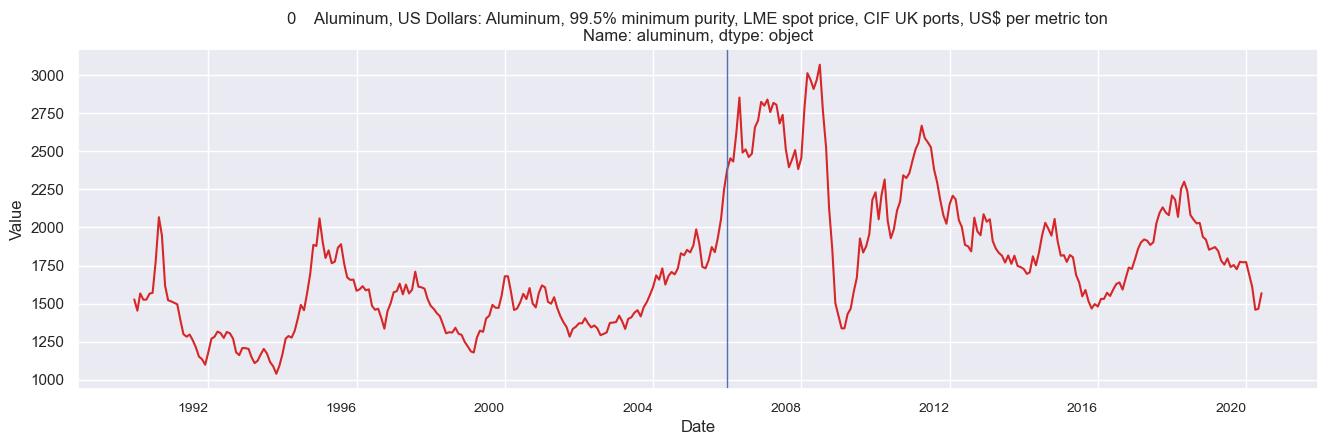

2006-01-01 00:00:00


<Figure size 432x288 with 0 Axes>

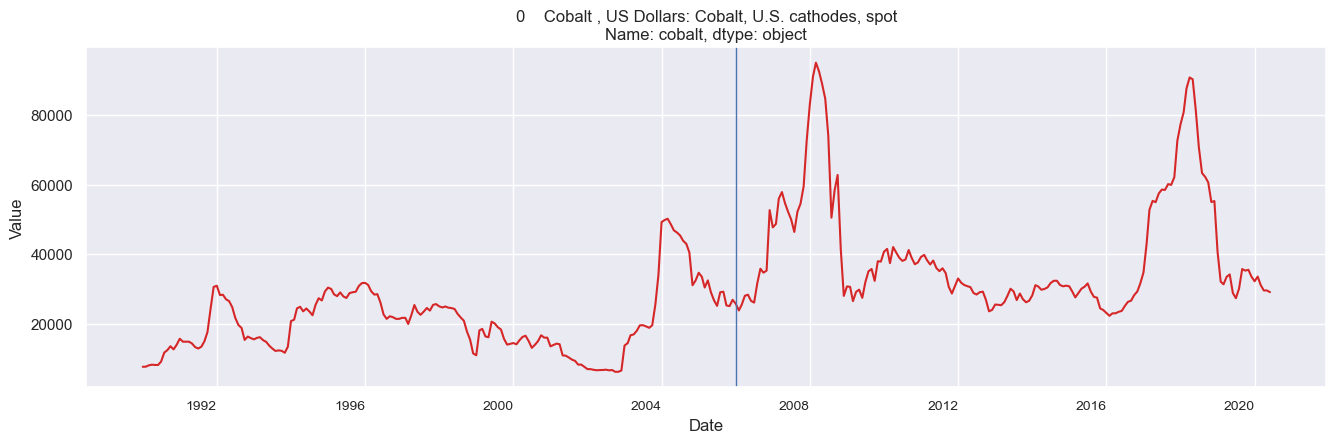

2006-01-01 00:00:00


<Figure size 432x288 with 0 Axes>

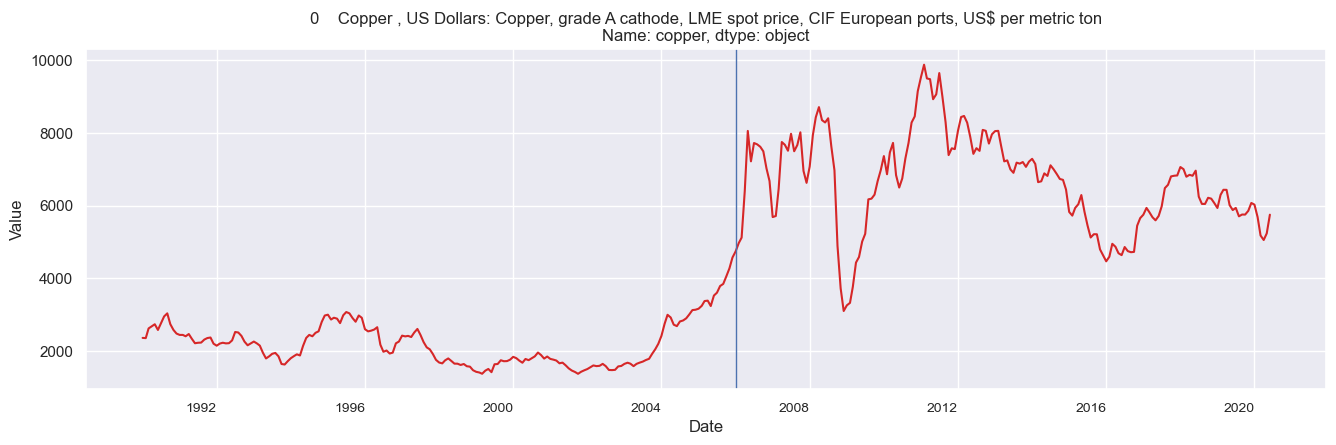

2006-01-01 00:00:00


<Figure size 432x288 with 0 Axes>

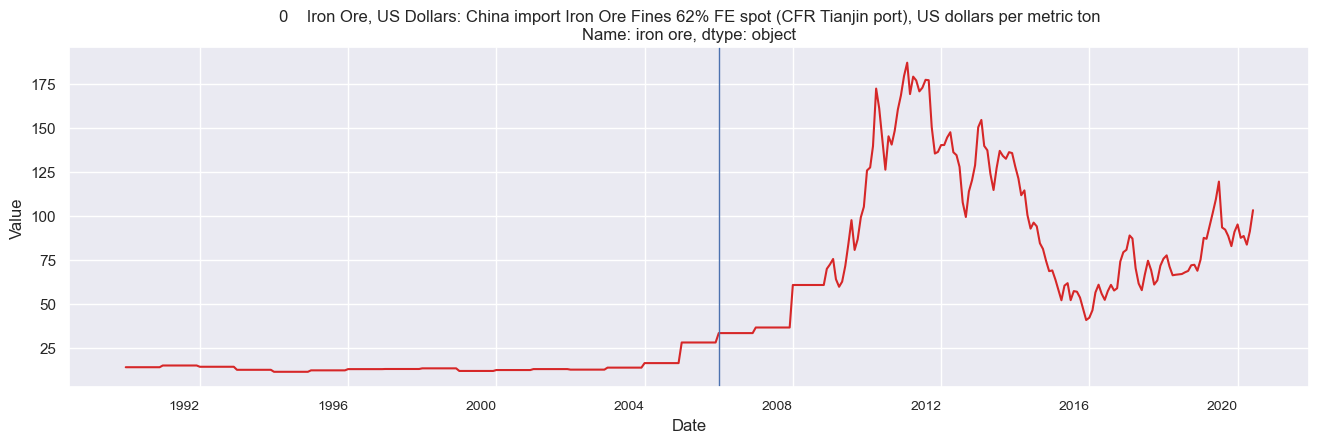

2006-01-01 00:00:00


<Figure size 432x288 with 0 Axes>

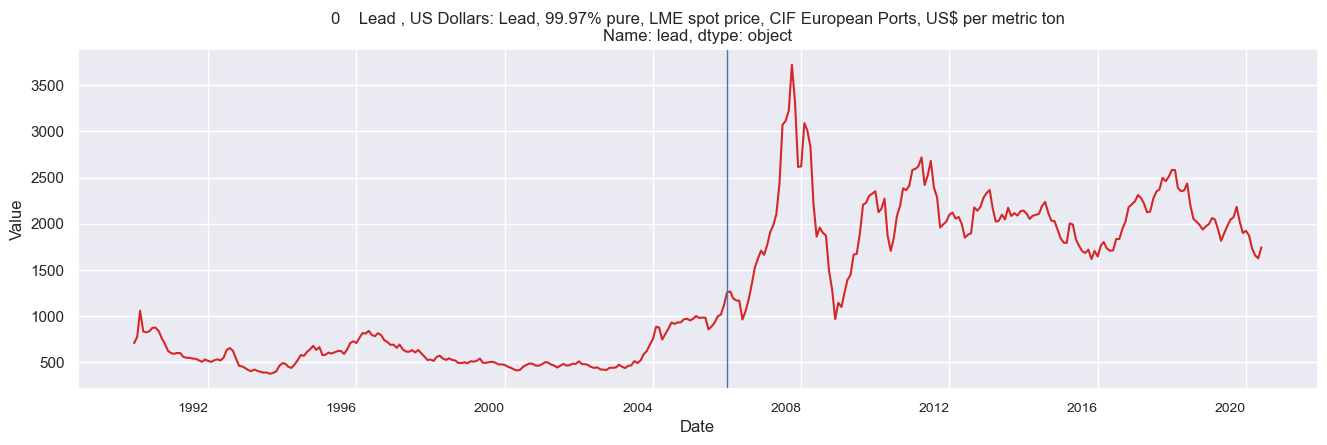

2006-01-01 00:00:00


<Figure size 432x288 with 0 Axes>

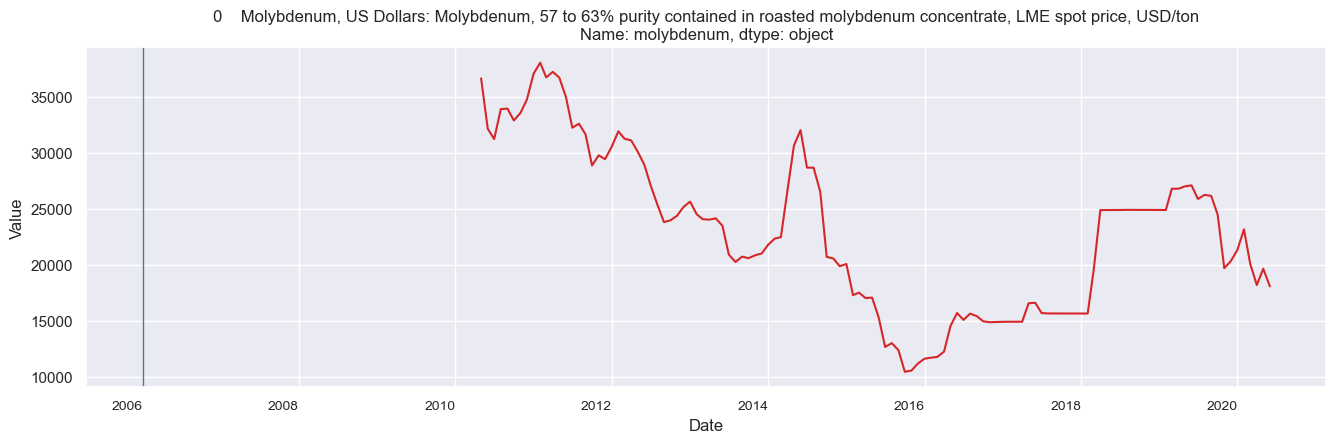

2006-01-01 00:00:00


<Figure size 432x288 with 0 Axes>

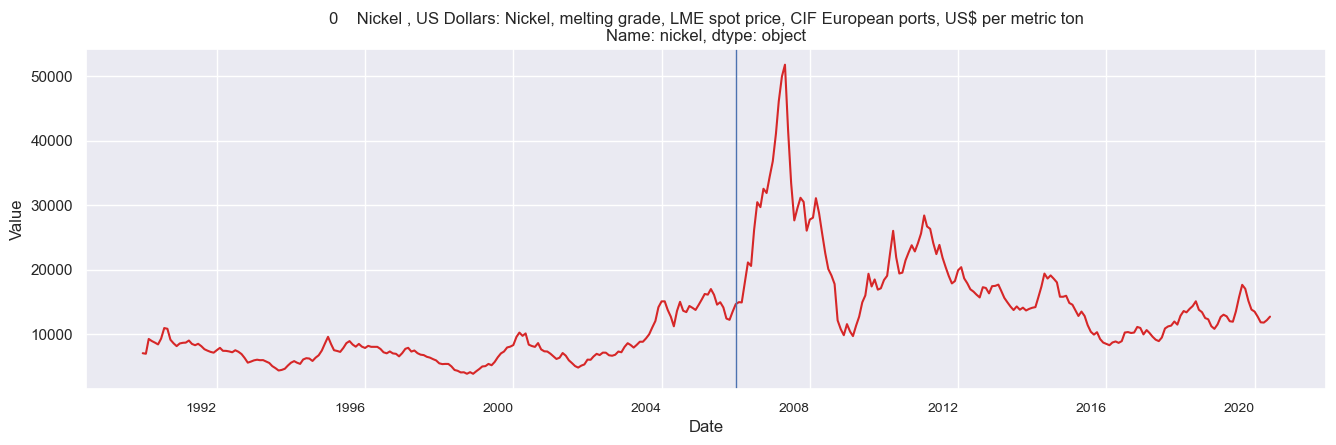

2006-01-01 00:00:00


<Figure size 432x288 with 0 Axes>

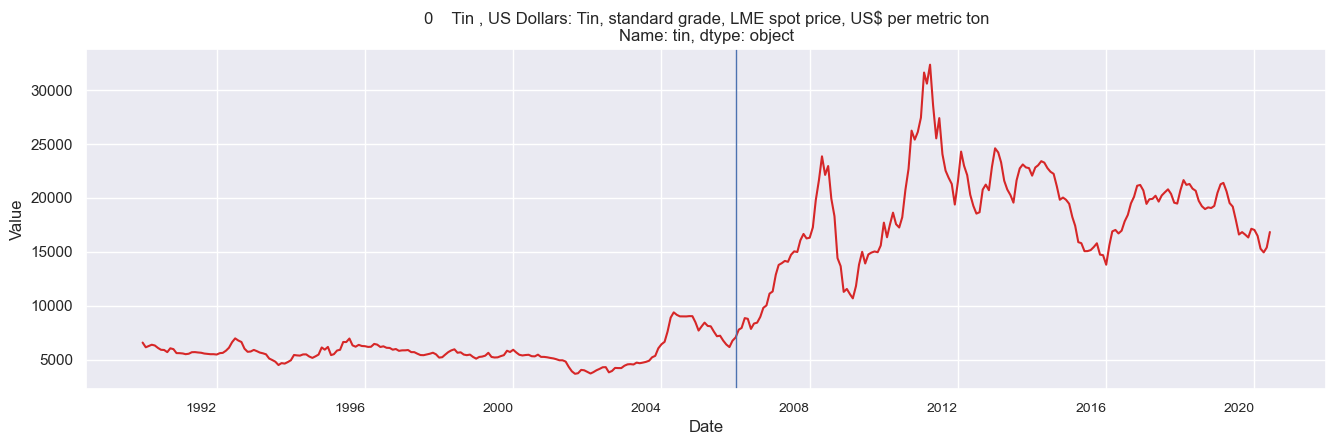

<Figure size 432x288 with 0 Axes>

In [6]:
#Plot Time Series on Monthly Data 

#fig,axs = plt.subplots(ncols=1, nrows=9, figsize=(16, 5))
#axs= axs.ravel()

cols = ['aluminum','cobalt','copper','iron ore', 'lead', 'molybdenum', 'nickel','tin']


for i,c in enumerate(cols):
    plot_df(df,x=df.dt_ym, y=df[c],title=f"{df_md[c]}",vline=dt.datetime(2006,1,1))
    
    
    plt.subplots_adjust(hspace=5)

    

#fig.tight_layout()
plt.show()

# Forecasting Iron Ore Time Series


C:\Users\danie\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


2006-01-01 00:00:00


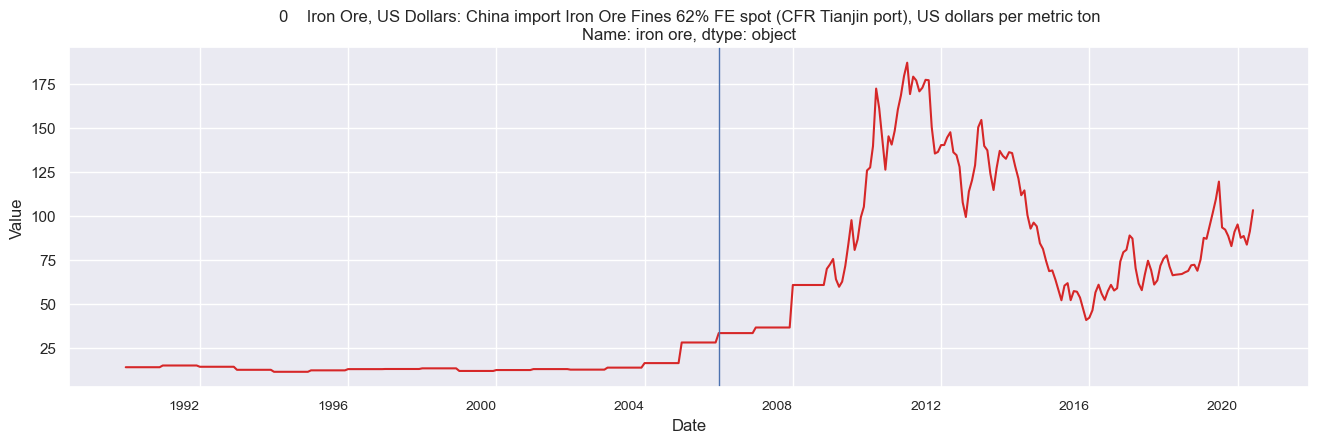

,iron ore,dt_ym,dt_y,dt_m
0,14.05,1990-01-01,1990-01-01,1
1,14.05,1990-02-01,1990-01-01,2
2,14.05,1990-03-01,1990-01-01,3
3,14.05,1990-04-01,1990-01-01,4
4,14.05,1990-05-01,1990-01-01,5


In [7]:
df_ir = df[['iron ore','dt_ym','dt_y','dt_m']]

df_ir['dt_y'] = pd.to_datetime(df['dt_y'], format='%Y')

plot_df(df,x=df_ir.dt_ym, y=df_ir['iron ore'],title=f"{df_md['iron ore']}",vline=dt.datetime(2006,1,1))

df_ir.head()

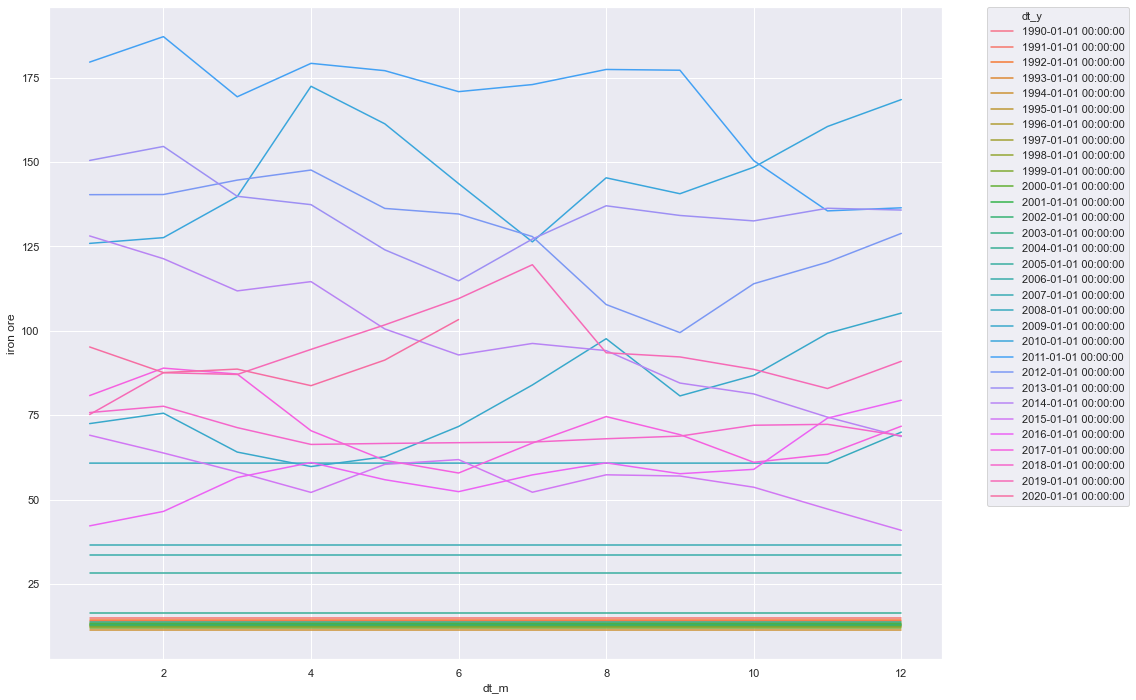

In [8]:
fig,axs = plt.subplots(ncols=1, nrows=1, figsize=(16, 12))
g = sns.lineplot(data=df_ir, x='dt_m', y='iron ore', hue='dt_y', legend='brief')
#plt.legend(loc='upper right')
plt

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Não éobservado sazonalidade nos dados mensais. 

In [9]:
ts_df = df[['dt_ym','iron ore']]
ts_df.set_index('dt_ym', inplace=True)

series = ts_df.values

C:\Users\danie\anaconda3\envs\priceforecast\lib\site-packages\pandas\plotting\_matplotlib\misc.py:409: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


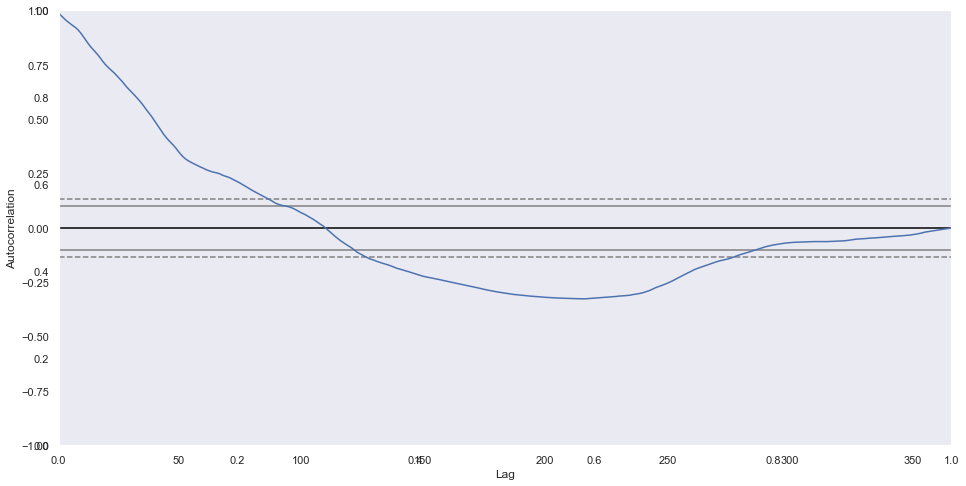

ADF Statistic: -1.502037
p-value: 0.532503
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


In [10]:
# Correlogram Plot and ADF 
fig,axs = plt.subplots(ncols=1, nrows=1, figsize=(16, 8))

pd.plotting.autocorrelation_plot(series)
plt.show()


# statistical test
result = adfuller(series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

### Observações:
- Existe uma autocorrelação positiva na série até 100-120. Há forte correlação até +/- 80. 
- A hipótese nula, a série é não estacionária, é aceita pelo teste de dickey-fuller aumentado; ADF > critical_values
- Ingenuamente: AR(25) I(1) MA(0)

In [11]:
# Ajustando ARIMA em todo o dataset e checando os residuais
# fit model
model = ARIMA(series, order=(7,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  365
Model:                 ARIMA(7, 1, 0)   Log Likelihood               -1154.382
Method:                       css-mle   S.D. of innovations              5.718
Date:                Mon, 17 Aug 2020   AIC                           2326.765
Time:                        22:41:49   BIC                           2361.864
Sample:                             1   HQIC                          2340.714
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2405      0.289      0.833      0.405      -0.325       0.806
ar.L1.D.y      0.2130      0.052      4.060      0.000       0.110       0.316
ar.L2.D.y     -0.1596      0.054     -2.972      0.0

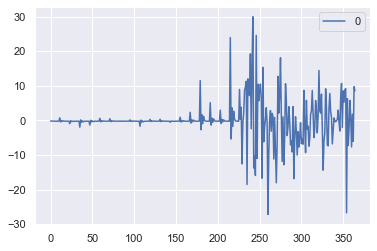

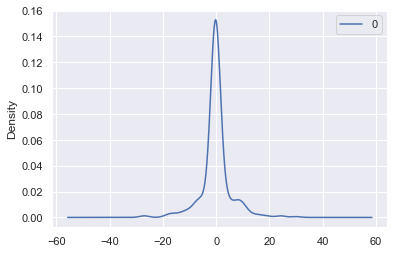

                0
count  365.000000
mean    -0.000392
std      5.725500
min    -27.194112
25%     -0.360490
50%     -0.249745
75%      0.135072
max     29.931359


In [12]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

predicted=117.664845, expected=100.560000
predicted=99.216706, expected=92.852381
predicted=95.373078, expected=96.260870
predicted=98.451358, expected=94.142857
predicted=94.411024, expected=84.522727
predicted=85.399822, expected=81.304348
predicted=82.574066, expected=74.425000
predicted=72.562245, expected=68.673913
predicted=69.191466, expected=69.068182
predicted=70.840155, expected=63.800000
predicted=63.088976, expected=58.181818
predicted=58.580571, expected=52.113636
predicted=51.373784, expected=60.428571
predicted=62.799885, expected=61.840909
predicted=61.678114, expected=52.173913
predicted=51.547521, expected=57.333333
predicted=59.492723, expected=56.977273
predicted=54.566883, expected=53.659091
predicted=54.109775, expected=47.190476
predicted=47.114393, expected=40.882609
predicted=39.807826, expected=42.204762
predicted=42.781139, expected=46.485714
predicted=47.788728, expected=56.539130
predicted=59.404202, expected=60.966667
predicted=61.365170, expected=55.88636

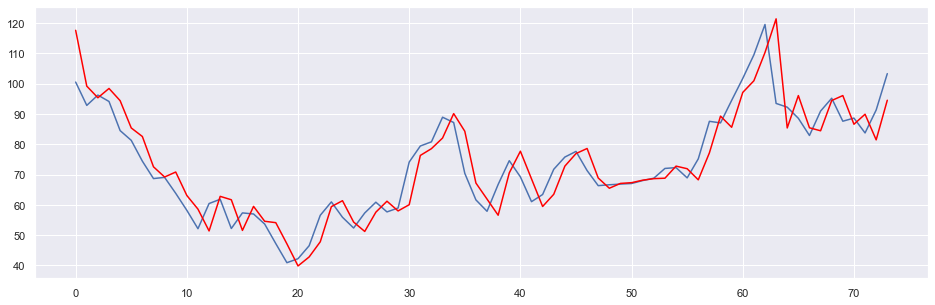

In [47]:
#from sklearn.metrics import mean_squared_error
#from sklearn.metrics import mean_absolute_error
#from sklearn.metrics import r2_score
import math 

X = series
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(7,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    
mse = mean_squared_error(test, predictions)
rmse = math.sqrt(mse)
mae = mean_absolute_error(test, predictions)
r2 = r2_score(test, predictions)

print('Test MSE: %.3f' % mse)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)
print('Test R2: %.3f' % r2)

# plot
fig,axs =  plt.subplots(ncols=1, nrows=1, figsize=(16, 5))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [14]:
obs_df = df_ir.iloc[size:len(X)]
obs_df['pred'] = predictions
obs_df['pred'] = obs_df['pred'].apply(lambda x: x[0])

obs_df.head()

C:\Users\danie\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\danie\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,iron ore,dt_ym,dt_y,dt_m,pred
292,100.560000,2014-05-01,2014-01-01,5,117.664845
293,92.852381,2014-06-01,2014-01-01,6,99.216706
294,96.260870,2014-07-01,2014-01-01,7,95.373078
295,94.142857,2014-08-01,2014-01-01,8,98.451358
296,84.522727,2014-09-01,2014-01-01,9,94.411024


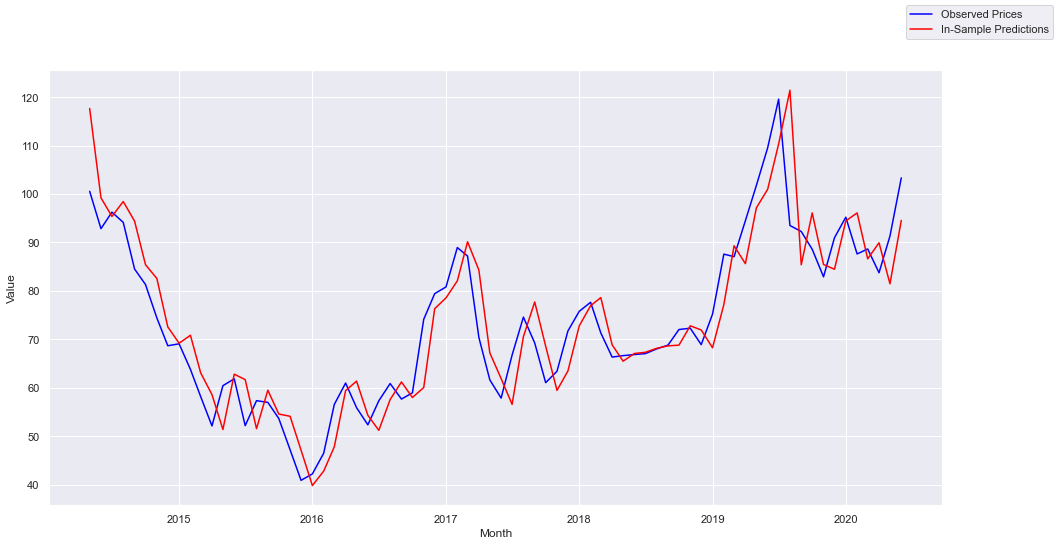

Test MSE: 50.475
Test RMSE: 7.105
Test MAE: 5.523
Test R2: 0.817


In [48]:
#plot
fig = plt.figure(figsize=(16,8))
sns.lineplot(x='dt_ym', y='iron ore', data=obs_df, color='blue')
sns.lineplot(x='dt_ym', y='pred', data=obs_df, color='red')
fig.legend(labels=['Observed Prices','In-Sample Predictions'])

plt.xlabel('Month')
plt.ylabel('Value')
plt.show()

print('Test MSE: %.3f' % mse)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)
print('Test R2: %.3f' % r2)

In [53]:
pd.DataFrame({
    'Test MSE': mse,
    'Test RMSE': rmse,
    'Test MAE': mae,
    'Test R2': r2
}, index=['ARIMA']).to_csv('./naive_arima.csv')